In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
dados = pd.read_csv("/content/kc_house.csv")
dados.shape

(21613, 21)

In [5]:
pd.options.display.max_columns = 25
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
dados.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
dados['year'] = pd.to_numeric(dados['date'].str.slice(0, 4))
dados['month'] = pd.to_numeric(dados['date'].str.slice(4, 6))
dados['day'] = pd.to_numeric(dados['date'].str.slice(6, 8))

dados.drop(['id'], axis="columns", inplace=True)
dados.drop(['date'], axis="columns", inplace=True)
dados.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [29]:
data_num = dados.shape[0]
index = np.random.permutation(data_num)
train_index = index[:int(data_num *0.6)]
validation_index = index[int(data_num *0.6):int(data_num *0.8)]
test_index = index[int(data_num *0.8):]
training_set = dados.loc[train_index]
validation_set = dados.loc[validation_index]
test_set = dados.loc[test_index]

train_validation_set = pd.concat([training_set, validation_set])
media = train_validation_set.mean()
dp = train_validation_set.std()
dados_train = (training_set - media) / dp
dados_val = (validation_set - media) / dp

x_train = np.array(dados_train.drop('price', axis='columns'))
y_train = np.array(dados_train['price'])
x_val = np.array(dados_val.drop('price', axis='columns'))
y_val = np.array(dados_val['price'])

x_train.shape

(12967, 21)

In [30]:
modelo = keras.Sequential(name='modelo-01')
modelo.add(layers.Dense(64, activation='relu', input_shape=(21,)))
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dense(1))
modelo.summary()

modelo.compile(keras.optimizers.Adam(0.001),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

history = modelo.fit(x_train, y_train, batch_size=64, epochs=300, validation_data=(x_val, y_val))
history.history.keys()

Model: "modelo-01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                1408      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
203/203 [==============================] - 1s 3ms/step - loss: 0.3257 - mean_absolute_error: 0.3566 - val_loss: 0.2286 - val_mean_absolute_error: 0.3009
Epoch 2/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2052 - mean_absolute_error: 0.2801 - val_loss: 0.1995 - val_mean_absolute_err

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

Text(0.5, 1.0, 'Model Complexity Reduction')

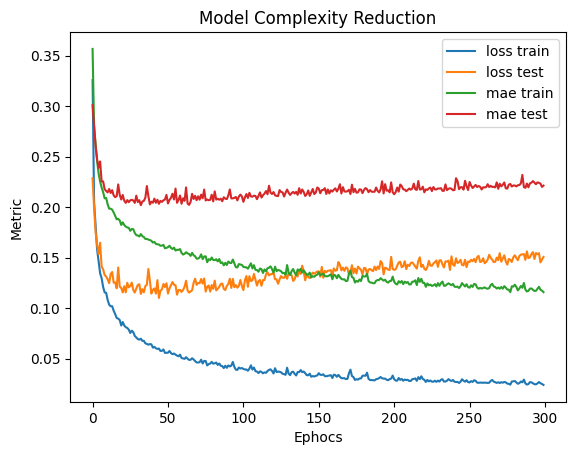

In [32]:
plt.plot(history.history['loss'] , label='loss train')
plt.plot(history.history['val_loss'] , label='loss test')

plt.plot(history.history['mean_absolute_error'] , label='mae train')
plt.plot(history.history['val_mean_absolute_error'] , label='mae test')

plt.ylabel('Metric')
plt.xlabel('Ephocs')
plt.legend(loc='upper right')
plt.title('Model Complexity Reduction')

In [33]:
# Criação do MODELO 02 - REDUÇÃO DA COMPLEXIDADE DO MODELO
model_complexity_reduction = keras.Sequential(name='modelo-2')
model_complexity_reduction.add(layers.Dense(16, activation='relu', input_shape=(21,)))
model_complexity_reduction.add(layers.Dense(16, activation='relu'))
model_complexity_reduction.add(layers.Dense(1))
model_complexity_reduction.compile(keras.optimizers.Adam(0.001),
loss=keras.losses.MeanSquaredError(),
metrics=[keras.metrics.MeanAbsoluteError()])
history = model_complexity_reduction.fit(x_train, y_train, batch_size=64,
            epochs=300,validation_data=(x_val, y_val))

history.history.keys()

Epoch 1/300
203/203 [==============================] - 1s 3ms/step - loss: 0.4321 - mean_absolute_error: 0.4286 - val_loss: 0.3266 - val_mean_absolute_error: 0.3568
Epoch 2/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2694 - mean_absolute_error: 0.3316 - val_loss: 0.2614 - val_mean_absolute_error: 0.3199
Epoch 3/300
203/203 [==============================] - 0s 2ms/step - loss: 0.2339 - mean_absolute_error: 0.3056 - val_loss: 0.2379 - val_mean_absolute_error: 0.3035
Epoch 4/300
203/203 [==============================] - 0s 2ms/step - loss: 0.2166 - mean_absolute_error: 0.2928 - val_loss: 0.2248 - val_mean_absolute_error: 0.2997
Epoch 5/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2061 - mean_absolute_error: 0.2840 - val_loss: 0.2112 - val_mean_absolute_error: 0.2864
Epoch 6/300
203/203 [==============================] - 0s 2ms/step - loss: 0.1960 - mean_absolute_error: 0.2755 - val_loss: 0.2047 - val_mean_absolute_error: 0.2777
Epoch 7/30

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

Text(0.5, 1.0, 'Model Complexity Reduction')

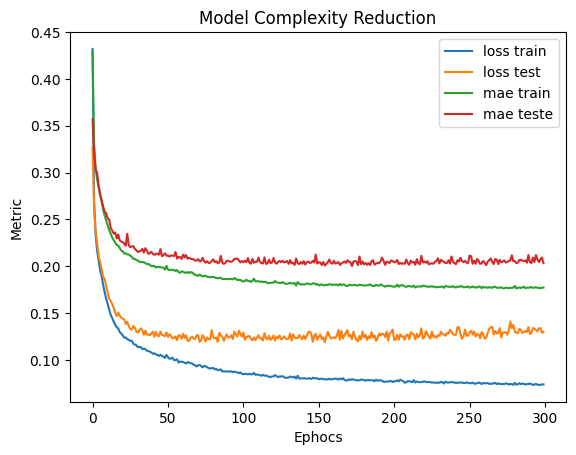

In [34]:
plt.plot(history.history['loss'] , label='loss train')
plt.plot(history.history['val_loss'] , label='loss test')


plt.plot(history.history['mean_absolute_error'] , label='mae train')
plt.plot(history.history['val_mean_absolute_error'] , label='mae teste')

plt.legend(loc='upper right')
plt.ylabel('Metric')
plt.xlabel('Ephocs')
plt.title('Model Complexity Reduction')

In [35]:
modelo_3 = keras.Sequential(name='modelo-3')
modelo_3.add(layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001),
                         activation='relu', input_shape=(21,)))
modelo_3.add(layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001),
                         activation='relu'))
modelo_3.add(layers.Dense(1))
modelo_3.compile(keras.optimizers.Adam(0.001),
loss=keras.losses.MeanSquaredError(),
metrics=[keras.metrics.MeanAbsoluteError()])
history = modelo_3.fit(x_train, y_train, batch_size=64,epochs=300,
            validation_data=(x_val, y_val))

history.history.keys()

Epoch 1/300
203/203 [==============================] - 1s 3ms/step - loss: 0.4849 - mean_absolute_error: 0.3708 - val_loss: 0.3223 - val_mean_absolute_error: 0.3046
Epoch 2/300
203/203 [==============================] - 0s 2ms/step - loss: 0.2980 - mean_absolute_error: 0.2916 - val_loss: 0.2851 - val_mean_absolute_error: 0.2856
Epoch 3/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2676 - mean_absolute_error: 0.2721 - val_loss: 0.2605 - val_mean_absolute_error: 0.2676
Epoch 4/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2434 - mean_absolute_error: 0.2569 - val_loss: 0.2459 - val_mean_absolute_error: 0.2602
Epoch 5/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2273 - mean_absolute_error: 0.2481 - val_loss: 0.2357 - val_mean_absolute_error: 0.2426
Epoch 6/300
203/203 [==============================] - 0s 2ms/step - loss: 0.2147 - mean_absolute_error: 0.2387 - val_loss: 0.2214 - val_mean_absolute_error: 0.2375
Epoch 7/30

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

Text(0.5, 1.0, 'L2 Regularization')

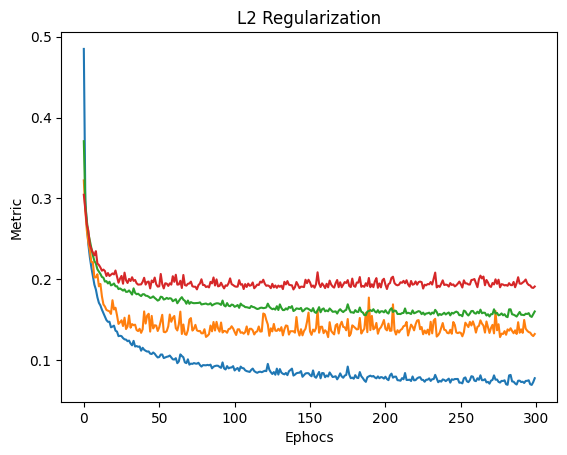

In [36]:
plt.plot(history.history['loss'] , label='loss train')
plt.plot(history.history['val_loss'] , label='loss test')

plt.plot(history.history['mean_absolute_error'] , label='mae train')
plt.plot(history.history['val_mean_absolute_error'] , label='mae test')

plt.ylabel('Metric')
plt.xlabel('Ephocs')
plt.title('L2 Regularization')

In [37]:
modelo_4 = keras.Sequential(name='modelo-4')
modelo_4.add(layers.Dense(64, activation='relu', input_shape=(21,)))
modelo_4.add(layers.Dropout(0.3))
modelo_4.add(layers.Dense(64, activation='relu'))
modelo_4.add(layers.Dropout(0.3))
modelo_4.add(layers.Dense(1))
modelo_4.compile(keras.optimizers.Adam(0.001),
                loss=keras.losses.MeanSquaredError(),metrics=[keras.metrics.MeanAbsoluteError()])
history = modelo_4.fit(x_train, y_train, batch_size=64,epochs=300,
            validation_data=(x_val, y_val))

history.history.keys()

Epoch 1/300
203/203 [==============================] - 2s 4ms/step - loss: 0.5361 - mean_absolute_error: 0.4838 - val_loss: 0.2675 - val_mean_absolute_error: 0.3190
Epoch 2/300
203/203 [==============================] - 1s 3ms/step - loss: 0.3456 - mean_absolute_error: 0.3730 - val_loss: 0.2395 - val_mean_absolute_error: 0.3025
Epoch 3/300
203/203 [==============================] - 1s 2ms/step - loss: 0.2962 - mean_absolute_error: 0.3428 - val_loss: 0.2519 - val_mean_absolute_error: 0.3044
Epoch 4/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2787 - mean_absolute_error: 0.3282 - val_loss: 0.2503 - val_mean_absolute_error: 0.3045
Epoch 5/300
203/203 [==============================] - 1s 2ms/step - loss: 0.2542 - mean_absolute_error: 0.3157 - val_loss: 0.2536 - val_mean_absolute_error: 0.3014
Epoch 6/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2435 - mean_absolute_error: 0.3053 - val_loss: 0.2043 - val_mean_absolute_error: 0.2758
Epoch 7/30

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

Text(0.5, 1.0, 'Dropout')

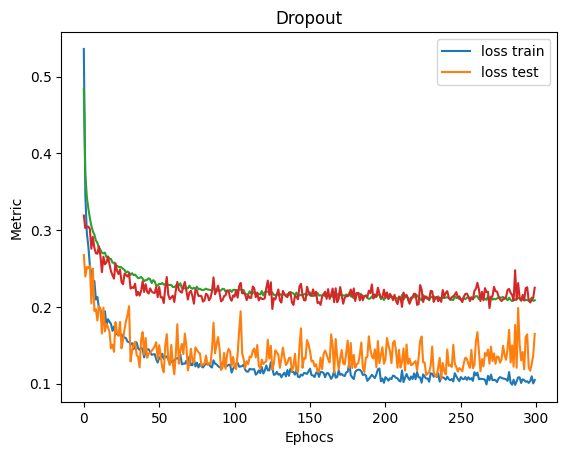

In [39]:
plt.plot(history.history['loss'] , label='loss train')
plt.plot(history.history['val_loss'] , label='loss test')
plt.legend(loc='upper right')

plt.plot(history.history['mean_absolute_error'] , label='mae train')
plt.plot(history.history['val_mean_absolute_error'] , label='mae test')

plt.ylabel('Metric')
plt.xlabel('Ephocs')
plt.title('Dropout')